# IS 362 – Project 2

## 1- First I will use a database about Soccer teams on Fifa.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\Victor Pessoa\\Desktop\\Project 2\\male_teams.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6947 entries, 0 to 6946
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_id                      6947 non-null   int64  
 1   team_url                     6947 non-null   object 
 2   fifa_version                 6947 non-null   int64  
 3   fifa_update                  6947 non-null   int64  
 4   update_as_of                 6947 non-null   object 
 5   team_name                    6947 non-null   object 
 6   league_id                    6947 non-null   int64  
 7   league_name                  6947 non-null   object 
 8   league_level                 6497 non-null   float64
 9   nationality_id               6947 non-null   int64  
 10  nationality_name             6947 non-null   object 
 11  overall                      6947 non-null   int64  
 12  attack                       6947 non-null   int64  
 13  midfield          

### I want to fill missing numerical values with the median. I also will fill missing categorical values with 'Unknown'.

In [2]:
numerical_columns_with_na = ['coach_id', 'domestic_prestige', 'transfer_budget_eur', 'club_worth_eur', 'captain']
for column in numerical_columns_with_na:
    df[column].fillna(df[column].median(), inplace=True)

categorical_columns_with_na = ['short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties']
for column in categorical_columns_with_na:
    df[column].fillna('Unknown', inplace=True)

In [3]:
print(df.isnull().sum())

team_id                           0
team_url                          0
fifa_version                      0
fifa_update                       0
update_as_of                      0
team_name                         0
league_id                         0
league_name                       0
league_level                    450
nationality_id                    0
nationality_name                  0
overall                           0
attack                            0
midfield                          0
defence                           0
coach_id                          0
home_stadium                     12
rival_team                        0
international_prestige            0
domestic_prestige                 0
transfer_budget_eur               0
club_worth_eur                    0
starting_xi_average_age           0
whole_team_average_age            0
captain                           0
short_free_kick                   0
long_free_kick                    0
left_short_free_kick        

### Since I still have missing values I will change any additional numerical columns to fill with median.

In [4]:
additional_numerical_columns_with_na = ['league_level', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width']
for column in additional_numerical_columns_with_na:
    df[column].fillna(df[column].median(), inplace=True)

additional_categorical_columns_with_na = ['home_stadium', 'def_style', 'off_style', 'build_up_play_positioning', 'chance_creation_positioning']
for column in additional_categorical_columns_with_na:
    df[column].fillna('Unknown', inplace=True)

print(df.isnull().sum())

team_id                           0
team_url                          0
fifa_version                      0
fifa_update                       0
update_as_of                      0
team_name                         0
league_id                         0
league_name                       0
league_level                      0
nationality_id                    0
nationality_name                  0
overall                           0
attack                            0
midfield                          0
defence                           0
coach_id                          0
home_stadium                      0
rival_team                        0
international_prestige            0
domestic_prestige                 0
transfer_budget_eur               0
club_worth_eur                    0
starting_xi_average_age           0
whole_team_average_age            0
captain                           0
short_free_kick                   0
long_free_kick                    0
left_short_free_kick        

### Almost there.Now I will try handling 'left_corner' and 'right_corner'
### I am assuming they are numerical and filling with median, and also filling with 'Unknown'.

In [5]:
df['left_corner'].fillna(df['left_corner'].median(), inplace=True)
df['right_corner'].fillna(df['right_corner'].median(), inplace=True)

large_na_columns = ['def_defence_defender_line', 'off_build_up_play', 'off_chance_creation', 'off_team_width', 'off_players_in_box', 'off_corners', 'off_free_kicks', 'build_up_play_speed', 'build_up_play_dribbling', 'build_up_play_passing', 'chance_creation_passing', 'chance_creation_crossing', 'chance_creation_shooting']
for column in large_na_columns:
    df[column].fillna('Unknown', inplace=True)

print(df.isnull().sum())

team_id                        0
team_url                       0
fifa_version                   0
fifa_update                    0
update_as_of                   0
team_name                      0
league_id                      0
league_name                    0
league_level                   0
nationality_id                 0
nationality_name               0
overall                        0
attack                         0
midfield                       0
defence                        0
coach_id                       0
home_stadium                   0
rival_team                     0
international_prestige         0
domestic_prestige              0
transfer_budget_eur            0
club_worth_eur                 0
starting_xi_average_age        0
whole_team_average_age         0
captain                        0
short_free_kick                0
long_free_kick                 0
left_short_free_kick           0
right_short_free_kick          0
penalties                      0
left_corne

### Now for visualization.

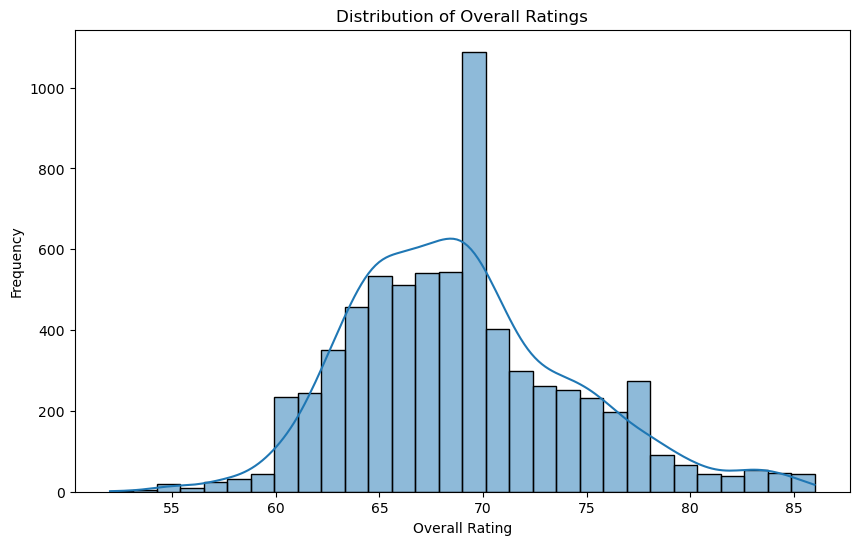

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['overall'], bins=30, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

In [7]:
print(df.describe(include='all'))

              team_id                team_url  fifa_version  fifa_update  \
count     6947.000000                    6947   6947.000000       6947.0   
unique            NaN                    6947           NaN          NaN   
top               NaN  /team/1/arsenal/150002           NaN          NaN   
freq              NaN                       1           NaN          NaN   
mean     44950.297682                     NaN     19.608320          2.0   
std      53463.946306                     NaN      2.836743          0.0   
min          1.000000                     NaN     15.000000          2.0   
25%        485.000000                     NaN     17.000000          2.0   
50%       1880.000000                     NaN     20.000000          2.0   
75%     110932.500000                     NaN     22.000000          2.0   
max     131389.000000                     NaN     24.000000          2.0   

       update_as_of team_name    league_id             league_name  \
count          69

### I will be creating a new column 'rating_category' based on 'overall'

In [8]:
df['rating_category'] = pd.cut(df['overall'], bins=[0, 70, 80, 90, 100], labels=['Low', 'Medium', 'High', 'Very High'])

In [9]:
print(df.head())

   team_id                         team_url  fifa_version  fifa_update  \
0        1           /team/1/arsenal/150002            15            2   
1        2       /team/2/aston-villa/150002            15            2   
2        3  /team/3/blackburn-rovers/150002            15            2   
3        4  /team/4/bolton-wanderers/150002            15            2   
4        5           /team/5/chelsea/150002            15            2   

  update_as_of         team_name  league_id     league_name  league_level  \
0   2014-09-18           Arsenal         13  Premier League           1.0   
1   2014-09-18       Aston Villa         13  Premier League           1.0   
2   2014-09-18  Blackburn Rovers         14    Championship           2.0   
3   2014-09-18  Bolton Wanderers         14      League One           2.0   
4   2014-09-18           Chelsea         13  Premier League           1.0   

   nationality_id  ... off_free_kicks  build_up_play_speed  \
0              14  ...        

### Again for visualization.

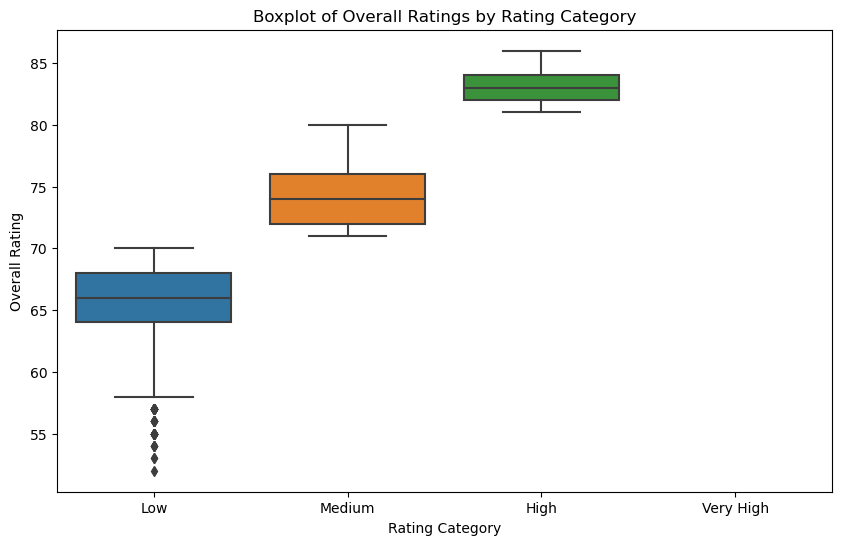

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='rating_category', y='overall', data=df)
plt.title('Boxplot of Overall Ratings by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Overall Rating')
plt.show()

## Insights from Boxplot
### The boxplot reveals that the majority of the teams fall under the "Medium" rating category, with only a few teams reaching a "High" rating level. This insight can be valuable for understanding the distribution of team skills and competencies within the dataset.


#### For instance, if you want to find the average overall rating for each league, run:#### For instance, if you want to find the average overall rating for each league, run:

In [11]:
df_grouped = df.groupby('league_name')['overall'].mean().reset_index()
print(df_grouped)


               league_name    overall
0              1. Division  69.000000
1                   1. HNL  71.777778
2            2. Bundesliga  69.316456
3                  3. Liga  65.191358
4                 A-League  63.844037
5              Allsvenskan  64.725000
6               Bundesliga  71.609589
7             Championship  70.525000
8              Ekstraklasa  65.361446
9              Eliteserien  64.662500
10              Eredivisie  69.172222
11            Fortuna Liga  72.789474
12  Friendly International  75.545872
13                J-League  66.554545
14      Jupiler Pro League  69.475904
15              K League 1  65.975000
16                 La Liga  76.411168
17               La Liga 2  69.825112
18              League One  64.158996
19              League Two  62.065844
20                  Liga 1  65.166667
21            Liga BetPlay  66.986486
22     Liga De Futbol Prof  65.192308
23                 Liga MX  70.296552
24           Liga Portugal  71.377778
25          

## 2- Seccond I will use a database about Soccer players on Fifa.

In [12]:
import pandas as pd

file_path = 'C:\\Users\\Victor Pessoa\\Desktop\\Project 2\\male_players.csv'

df_players = pd.read_csv(file_path)

print(df_players.head())


   player_id                                         player_url  fifa_version  \
0          2  https://sofifa.com/player/2/giovanni-pasquale/...          15.0   
1         11  https://sofifa.com/player/11/romain-rocchi/150002          15.0   
2         27       https://sofifa.com/player/27/joe-cole/150002          15.0   
3         28  https://sofifa.com/player/28/manuel-herrera-ya...          15.0   
4         41  https://sofifa.com/player/41/andres-iniesta-lu...          15.0   

   fifa_update update_as_of    short_name             long_name  \
0          2.0   2014-09-18   G. Pasquale     Giovanni Pasquale   
1          2.0   2014-09-18     R. Rocchi         Romain Rocchi   
2          2.0   2014-09-18       J. Cole              Joe Cole   
3          2.0   2014-09-18  Manu Herrera  Manuel Herrera Yagüe   
4          2.0   2014-09-18       Iniesta  Andrés Iniesta Luján   

  player_positions  overall  potential  ...   ldm   cdm   rdm   rwb    lb  \
0               LM       68      

### For this one I will be removing duplicated.

In [13]:
print("Number of rows before removing duplicates:", len(df_players))

Number of rows before removing duplicates: 180021


In [14]:
df_players.drop_duplicates(inplace=True)

In [15]:
print("Number of rows after removing duplicates:", len(df_players))

Number of rows after removing duplicates: 180021


### It seems like there were no duplicate rows in your DataFrame as the number of rows remained the same before and after running the drop_duplicates method.

### Now I will analyse the data. I will analyse Age VS. Potential.

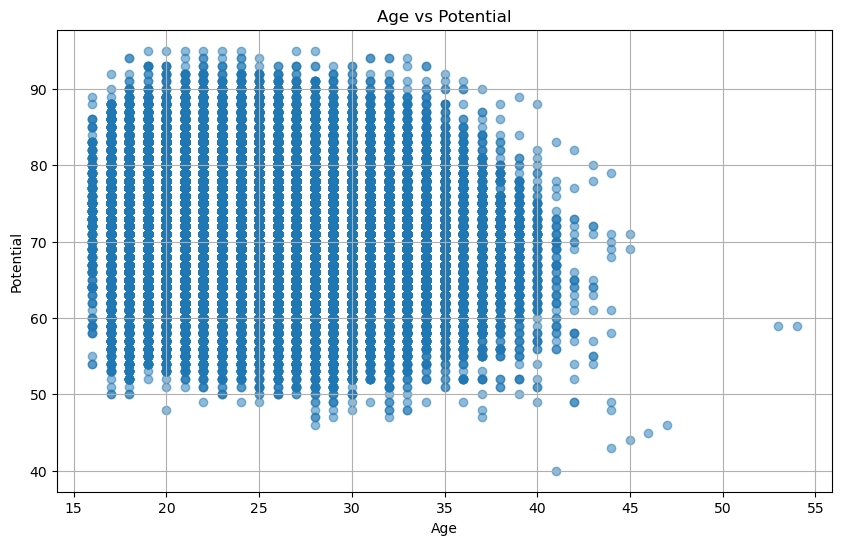

In [19]:
import matplotlib.pyplot as plt

age = df_players['age']
potential = df_players['potential']

plt.figure(figsize=(10,6))
plt.scatter(age, potential, alpha=0.5)
plt.title('Age vs Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.grid(True)
plt.show()


### The scatter plot shows the relationship between age and potential of the players and indicates a negative correlation between the two variables. This does align with the general expectation that younger players possess higher potential due to their opportunity to grow and develop their skills further, while older players may have already reached their peak performance levels.

### Following the typical patterns observed in such analyses, we observe a negative correlation between age and potential, as younger players tend to have higher potential to improve their skills and performance, whereas older players might be at the peak or declining phase of their careers.

# 3- Third dataset I will use a database about Soccer coaches on Fifa.

In [22]:
import pandas as pd

file_path = 'C:\\Users\\Victor Pessoa\\Desktop\\Project 2\\male_coaches.csv' 
df_coaches = pd.read_csv(file_path)

df.head()


,coach_id,coach_url,short_name,long_name,dob,nationality_name,coach_face_url,nation_flag_url
0,24,/coach/24/david-unsworth/,D. Unsworth,David Unsworth,1973-10-16,England,NaN,https://cdn.sofifa.net/flags/gb-eng.png
1,50,/coach/50/steven-gerrard/,S. Gerrard,Steven Gerrard,1980-05-30,England,https://cdn.sportmonks.com/images/soccer/playe...,https://cdn.sofifa.net/flags/gb-eng.png
2,95,/coach/95/frank-lampard/,F. Lampard,Frank Lampard,1978-06-20,England,https://cdn.sportmonks.com/images/soccer/playe...,https://cdn.sofifa.net/flags/gb-eng.png
3,121,/coach/121/carl-hoefkens/,C. Hoefkens,Carl Hoefkens,1978-10-05,Belgium,https://cdn.sportmonks.com/images//soccer/coac...,https://cdn.sofifa.net/flags/be.png
4,126,/coach/126/andy-dawson/,A. Dawson,Andy Dawson,1978-10-20,England,NaN,https://cdn.sofifa.net/flags/gb-eng.png


### For this last one I will clean up 3 things:

#### 1. I will try to handle missing values
#### For 'dob', let's drop the rows with missing 'dob' values as imputing them might not be accurate

#### 2. Then convert data types
#### Convert 'dob' to datetime format

#### 3. Finally try to calculate age
#### Calculate the age of the coaches based on 'dob'

In [23]:
from datetime import datetime

df_coaches.dropna(subset=['dob'], inplace=True)

df_coaches['dob'] = pd.to_datetime(df_coaches['dob'])

current_date = datetime.now()
df_coaches['age'] = df_coaches['dob'].apply(lambda dob: (current_date - dob).days // 365)

df_coaches.head()


,coach_id,coach_url,short_name,long_name,dob,nationality_name,coach_face_url,nation_flag_url,age
0,24,/coach/24/david-unsworth/,D. Unsworth,David Unsworth,1973-10-16,England,NaN,https://cdn.sofifa.net/flags/gb-eng.png,49
1,50,/coach/50/steven-gerrard/,S. Gerrard,Steven Gerrard,1980-05-30,England,https://cdn.sportmonks.com/images/soccer/playe...,https://cdn.sofifa.net/flags/gb-eng.png,43
2,95,/coach/95/frank-lampard/,F. Lampard,Frank Lampard,1978-06-20,England,https://cdn.sportmonks.com/images/soccer/playe...,https://cdn.sofifa.net/flags/gb-eng.png,45
3,121,/coach/121/carl-hoefkens/,C. Hoefkens,Carl Hoefkens,1978-10-05,Belgium,https://cdn.sportmonks.com/images//soccer/coac...,https://cdn.sofifa.net/flags/be.png,45
4,126,/coach/126/andy-dawson/,A. Dawson,Andy Dawson,1978-10-20,England,NaN,https://cdn.sofifa.net/flags/gb-eng.png,44


### Now I will analyse the distribution of coaches by nationality to understand which countries have the most representation.

In [24]:
nationality_counts = df_coaches['nationality_name'].value_counts()
print(nationality_counts)


Spain         107
Germany        97
Argentina      91
England        88
Italy          76
             ... 
Armenia         1
Luxembourg      1
Canada          1
India           1
Israel          1
Name: nationality_name, Length: 64, dtype: int64


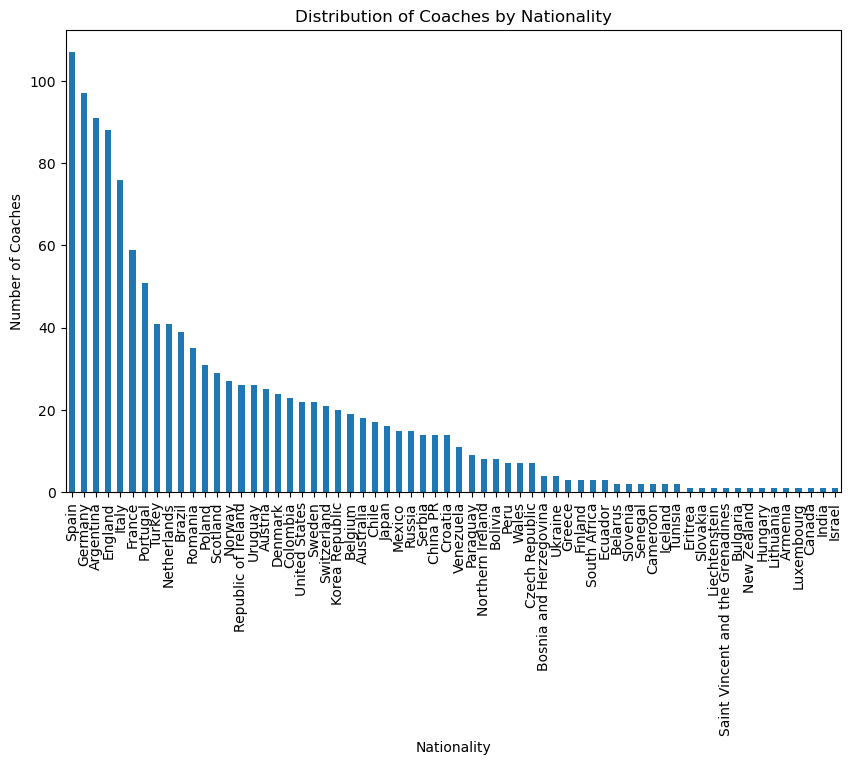

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
nationality_counts.plot(kind='bar')
plt.title('Distribution of Coaches by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Coaches')
plt.show()


### The analysis reveals that Spain has the highest representation with 107 coaches, followed closely by Germany with 97, Argentina with 91, and England with 88. Italy also has substantial representation with 76 coaches. In contrast, countries like Armenia, Luxembourg, Canada, India, and Israel have only one coach represented in the dataset. In total, 64 different nationalities are represented.

### Looking at where soccer coaches come from, we see that a lot are from Spain, Germany, Argentina, and England. This is probably because soccer is very popular and important in these countries. However, there are coaches from 64 different countries in total, showing that soccer is a game loved by people all around the world. This mix of coaches from different places brings many ways of thinking and playing soccer, making the game more interesting and diverse.